Identify Outliers:

In order to identify outliers in the dataset, I firstly checked the dataset manually and found that two data items were not human employees in Enron, i.e., 'TOTAL' and 'THE TRAVEL AGENCY IN THE PARK', which would be removed from the dataset. 

Secondly, I checked the consistency between the pickled data and data read in enron61702insiderpay.pdf, and found that the data for Sanjay Bhatnagar and Robert Belfer are inconsistently wrong. Thus, I manually fixed these data based on the data in enron61702insiderpay.pdf. At current stage, there are 144 employees, 18 of which are pois, in the dataset.

Thirdly, I used box plots for each features. And each employee data for each feature were grouped by if he/she is a poi. Here, all 0s were removed since 0 meant such data were not avaliable in the dataset. I only applied avaliable data to identify outliers since avaliable data included more information.

Finally, because there are only 18 pois in the dataset, I decided to keep all the data of pois since the extreme data might reveal the patterns of fraud. Thus, I only manually checked all the shown outliers (extremely large or small) from non-pois in the dataset. According to my analysis, I have two levels of outlier suspects, where the Level-1 suspects: ['FREVERT MARK A', 'ALLEN PHILLIP K'], and LeveL-2 suspects: ['BECK SALLY W', 'KITCHEN LOUISE', 'PAI LOU L', 'SHAPIRO RICHARD S', 'URQUHART JOHN A']. Level-1 has higher probability of being outliers than Level-2.

In the following steps, I trend to use Level-1 list as the outlier list, but I will try both outlier lists based on machine learning performance.

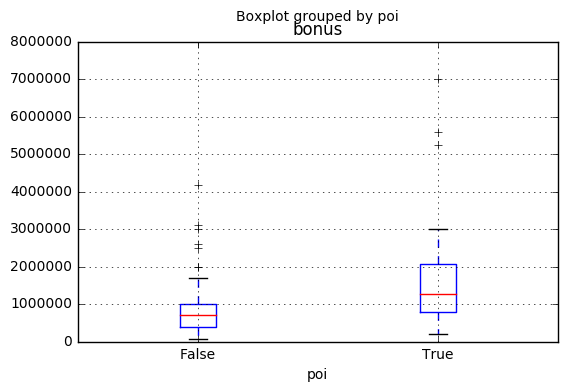

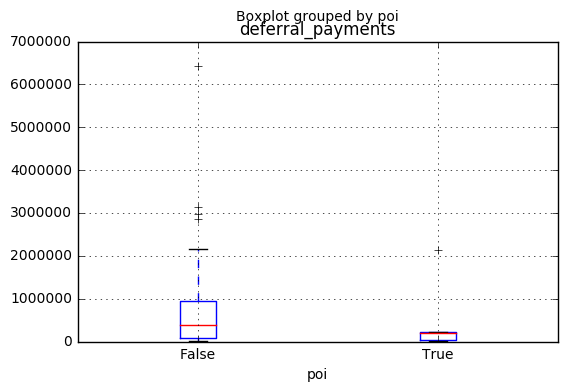

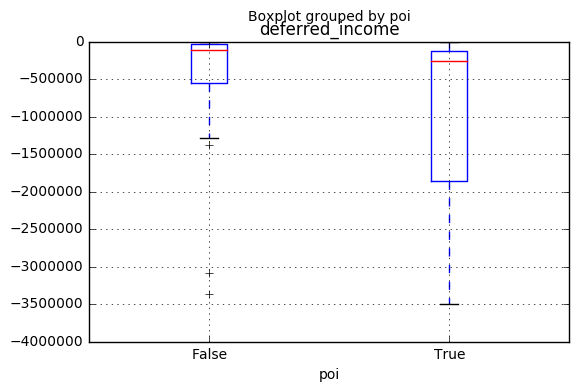

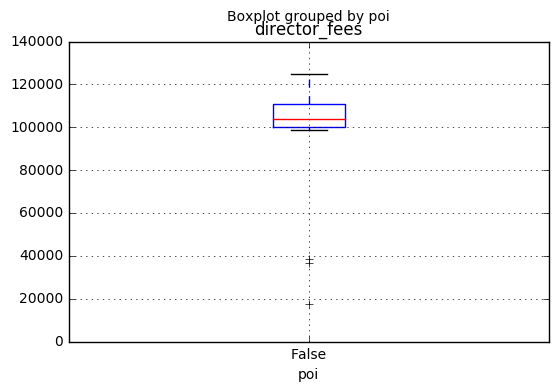

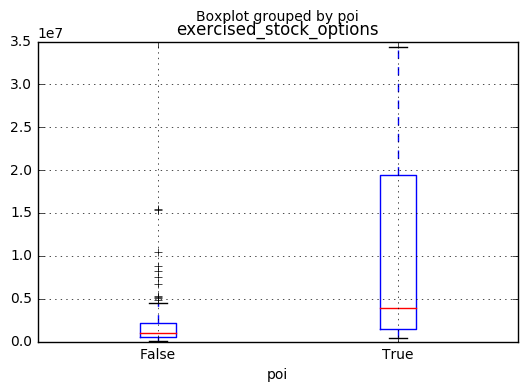

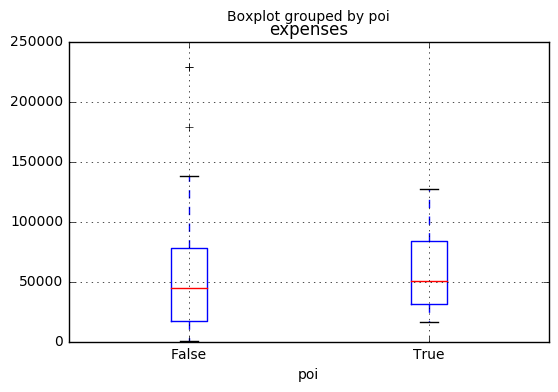

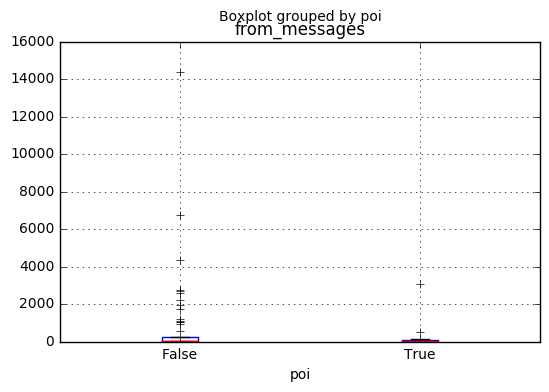

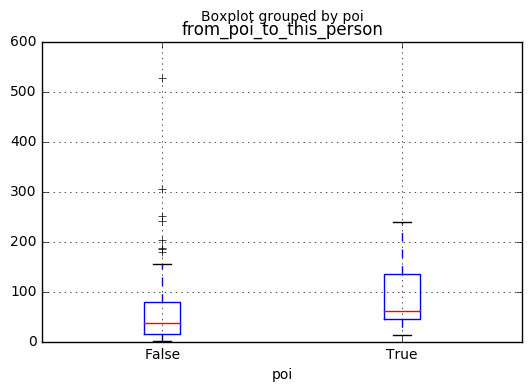

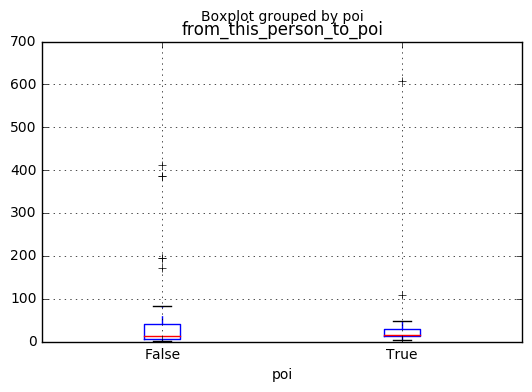

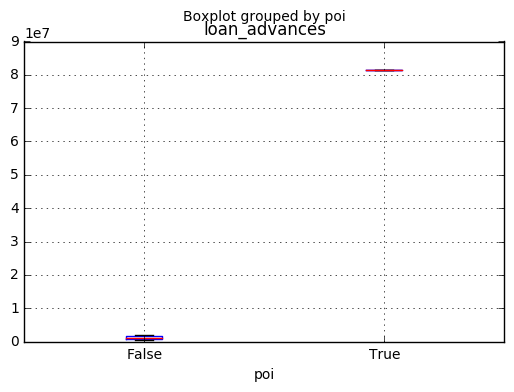

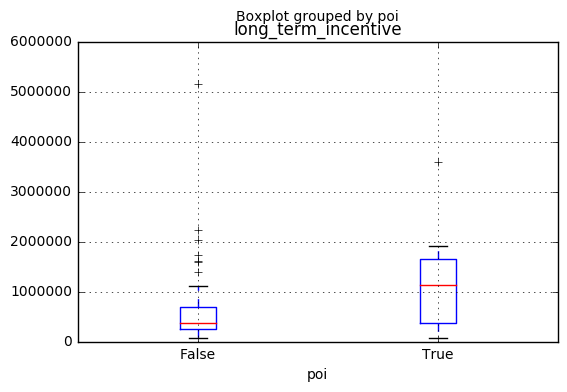

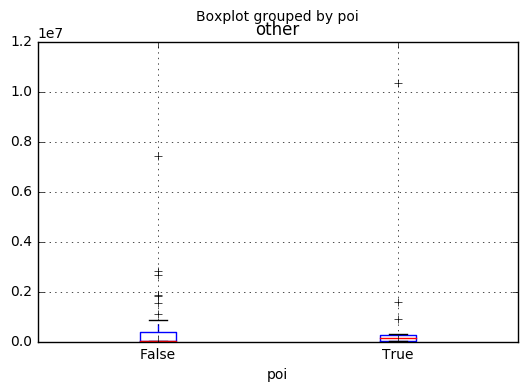

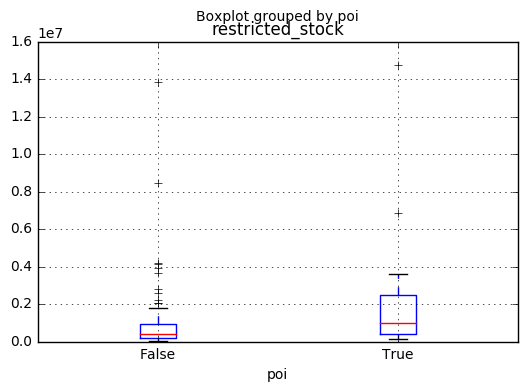

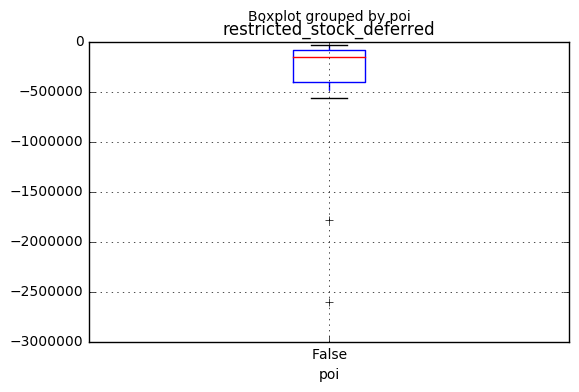

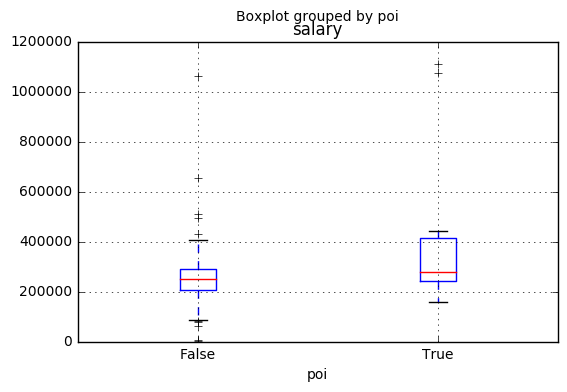

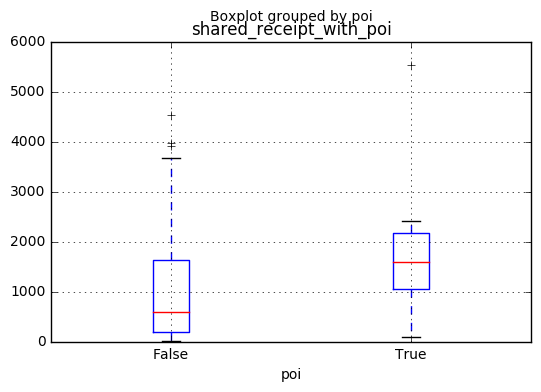

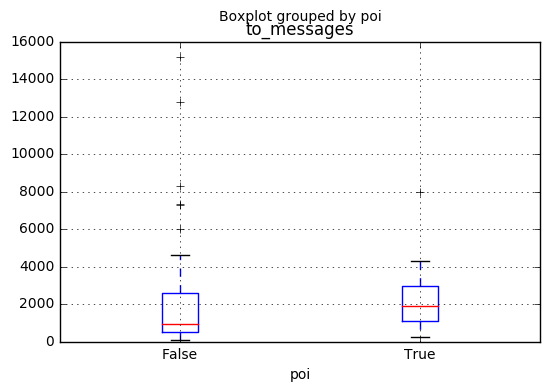

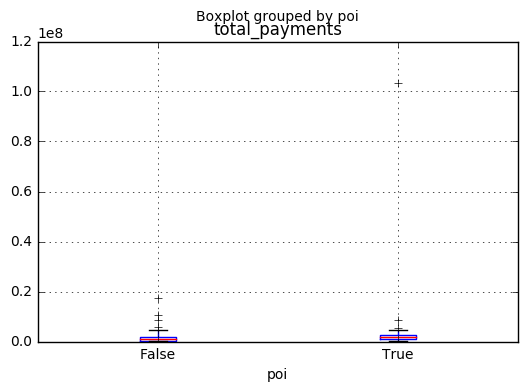

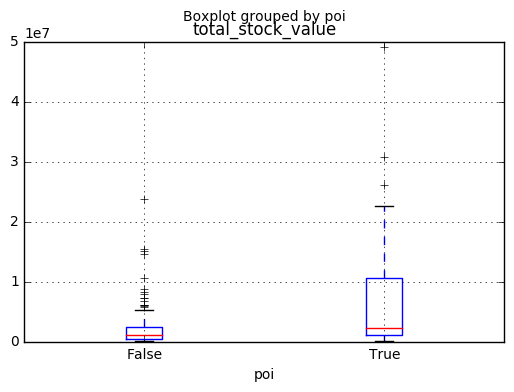

In [1]:
import sys
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


sys.path.append("../tools/")

with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

# remove non-employee data
data_dict.pop('TOTAL')
data_dict.pop('THE TRAVEL AGENCY IN THE PARK')

# convert 'NaN' to 0, and transform dict to dataframe
data_dict_tmp = [{feature: data_dict[employee][feature] if data_dict[employee][feature] != 'NaN' else 0 for feature in sorted( data_dict[employee].keys() )} for employee in sorted( data_dict.keys() )]
data_dict_pd = pd.DataFrame( data_dict_tmp, index = sorted(data_dict.keys()) )

# fix Sanjay Bhatnagar's data
data_dict_pd.loc['BHATNAGAR SANJAY','director_fees'] = 0
data_dict_pd.loc['BHATNAGAR SANJAY','exercised_stock_options'] = 15456290
data_dict_pd.loc['BHATNAGAR SANJAY','expenses'] = 137864
data_dict_pd.loc['BHATNAGAR SANJAY','other'] = 0
data_dict_pd.loc['BHATNAGAR SANJAY','restricted_stock'] = 2604490
data_dict_pd.loc['BHATNAGAR SANJAY','restricted_stock_deferred'] = -2604490
data_dict_pd.loc['BHATNAGAR SANJAY','total_payments'] = 137864
data_dict_pd.loc['BHATNAGAR SANJAY','total_stock_value'] = 15456290

# fix Robert Belfer's data
data_dict_pd.loc['BELFER ROBERT', 'deferral_payments'] = 0
data_dict_pd.loc['BELFER ROBERT', 'deferred_income'] = -102500
data_dict_pd.loc['BELFER ROBERT', 'director_fees'] = 102500
data_dict_pd.loc['BELFER ROBERT', 'exercised_stock_options'] = 0
data_dict_pd.loc['BELFER ROBERT', 'expenses'] = 3285
data_dict_pd.loc['BELFER ROBERT', 'restricted_stock'] = 44093
data_dict_pd.loc['BELFER ROBERT', 'restricted_stock_deferred'] = -44093
data_dict_pd.loc['BELFER ROBERT', 'total_payments'] = 3285
data_dict_pd.loc['BELFER ROBERT', 'total_stock_value'] = 0

for i in data_dict_pd.columns:
    if i != 'poi' and i != 'email_address':
        df = data_dict_pd.loc[:,(i, 'poi')][ data_dict_pd.loc[:,i] != 0 ]
        df.boxplot(column=i, by='poi')
        plt.show()

bonus:
ALLEN PHILLIP K
LAVORATO JOHN J

deferral_payments:
ALLEN PHILLIP K
FREVERT MARK A

deferred_income:
ALLEN PHILLIP K
FREVERT MARK A

director_fees:
MEYER JEROME J
POWERS WILLIAM
URQUHART JOHN A

exercised_stock_options: main features

expenses:
MCCLELLAN GEORGE
SHANKMAN JEFFREY A
URQUHART JOHN A

from_messages:
KAMINSKI WINCENTY J
BECK SALLY W
KEAN STEVEN J

from_poi_to_this_person:
DIETRICH JANET R
KITCHEN LOUISE
LAVORATO JOHN J

from_this_person_to_poi
BECK SALLY W
KEAN STEVEN J
LAVORATO JOHN J

loan_advances:
FREVERT MARK A
PICKERING MARK R

long_term_incentive:
MARTIN AMANDA K

other:
FREVERT MARK A

restricted_stock:
PAI LOU L
WHITE JR THOMAS E

restricted_stock_deferred:
BHATNAGAR SANJAY
DERRICK JR. JAMES V

salary:
FREVERT MARK A

shared_receipt_with_poi:
SHAPIRO RICHARD S

to_messages:
KEAN STEVEN J
KITCHEN LOUISE
SHAPIRO RICHARD S

total_payments:

total_stock_value: main feature
PAI LOU L

In [2]:
potential_outliers = ['ALLEN PHILLIP K', 
'LAVORATO JOHN J', 
'ALLEN PHILLIP K', 
'FREVERT MARK A', 
'ALLEN PHILLIP K', 
'FREVERT MARK A', 
'MEYER JEROME J',
'POWERS WILLIAM',
'URQUHART JOHN A',
'MCCLELLAN GEORGE',
'SHANKMAN JEFFREY A',
'URQUHART JOHN A',
'KAMINSKI WINCENTY J',
'BECK SALLY W',
'KEAN STEVEN J',
'DIETRICH JANET R',
'KITCHEN LOUISE',
'LAVORATO JOHN J',
'BECK SALLY W',
'KEAN STEVEN J',
'LAVORATO JOHN J',
'FREVERT MARK A',
'PICKERING MARK R',
'MARTIN AMANDA K',
'FREVERT MARK A',
'PAI LOU L',
'WHITE JR THOMAS E',
'BHATNAGAR SANJAY',
'DERRICK JR. JAMES V',
'FREVERT MARK A',
'SHAPIRO RICHARD S',
'KEAN STEVEN J',
'KITCHEN LOUISE',
'SHAPIRO RICHARD S',
'PAI LOU L']
# count the appearence of identified potential outliers
from collections import Counter
Counter(potential_outliers)

# Level-1 outliers: ['FREVERT MARK A', 'ALLEN PHILLIP K']
# LeveL-2 outliers: ['BECK SALLY W', 'KITCHEN LOUISE', 'PAI LOU L', 'SHAPIRO RICHARD S', 'URQUHART JOHN A']

Counter({'ALLEN PHILLIP K': 3,
         'BECK SALLY W': 2,
         'BHATNAGAR SANJAY': 1,
         'DERRICK JR. JAMES V': 1,
         'DIETRICH JANET R': 1,
         'FREVERT MARK A': 5,
         'KAMINSKI WINCENTY J': 1,
         'KEAN STEVEN J': 3,
         'KITCHEN LOUISE': 2,
         'LAVORATO JOHN J': 3,
         'MARTIN AMANDA K': 1,
         'MCCLELLAN GEORGE': 1,
         'MEYER JEROME J': 1,
         'PAI LOU L': 2,
         'PICKERING MARK R': 1,
         'POWERS WILLIAM': 1,
         'SHANKMAN JEFFREY A': 1,
         'SHAPIRO RICHARD S': 2,
         'URQUHART JOHN A': 2,
         'WHITE JR THOMAS E': 1})